In [ ]:
!pip install h2o # install the h2o package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.5-py2.py3-none-any.whl size=265646558 sha256=4bbba0878b50c1a37beca9eacc532b81c8df40013c7ada2b4b628899b18ce8d5
  Stored in directory: /root/.cache/pip/wheels/1a/46/4f/9b366522399306d7849672d58aefb44c9b73378d710bde2853
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

In [ ]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpktn_exf7
  JVM stdout: /tmp/tmpktn_exf7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpktn_exf7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,2 months
H2O_cluster_name:,H2O_from_python_unknownUser_66v13j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
import numpy as np
import pandas as pd

#from utils import preprocessing
#from utils import utils
#from models import classifiers as clf
#from models import cgan
import sys, os , warnings
import matplotlib.pyplot as plt
# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#imports for models.classifier:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC ,LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_recall_fscore_support, f1_score
from collections import defaultdict

#from tabulate import tabulate
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SVMSMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN
from time import time
import os
from sklearn.metrics import f1_score

In [ ]:
def H2O_dataFormat(X_train, Y_train,X_test, Y_test):
    #get features
    target_name = Y_train.name
    features_names = list(X_train.columns) + [target_name]
    # Convert data to H2OFrame
    # Firstly, convert data to H2OFrame X_train, y_train
    X_train_h2o = h2o.H2OFrame(X_train)
    y_train_h2o = h2o.H2OFrame(Y_train.values)#Series don't work with H2O frame, so we convert X_train to numpy
    Traindata_h2o = X_train_h2o.cbind(y_train_h2o)#another sol, we can combine data frames firstly
    #set columns for Traindata_h20
    Traindata_h2o.columns = features_names
    #set the problem as a binary classification
    Traindata_h2o[target_name] = Traindata_h2o[target_name].asfactor()
    #Secondly  convert data to H2OFrame X_train, y_train
    X_test_h2o = h2o.H2OFrame(X_test.values)
    y_test_h2o = h2o.H2OFrame(Y_test.values)#Series don't work with H2O frame, so we convert X_test to numpy
    Testdata_h2o = X_test_h2o.cbind(y_test_h2o)
    #set columns for Testdata_h2o
    Testdata_h2o.columns = features_names
    #set the problem as a binary classification
    Testdata_h2o[target_name] = Testdata_h2o[target_name].asfactor()
    return Traindata_h2o,Testdata_h2o,features_names

In [ ]:
from xgboost import XGBClassifier as XGBC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
DISPLAY_PERFOMANCE = True

In [ ]:
labels_mapping = {
    "Normal":0,
    "Attack":1
}

In [ ]:
# Single Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
!pip install xgboost # install xgboost library
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:

#voting classifier setup:
from sklearn.ensemble import VotingClassifier

# Initialize individual classifiers
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

# Voting Classifier with majority voting
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_clf),
        ('random_forest', rf_clf),
        ('gradient_boosting', gb_clf),
    ],
    voting='soft'  # 'soft' uses predicted probabilities, 'hard' uses predicted labels
)

In [ ]:
# Single Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    #'KNN': KNeighborsClassifier(),
    #'Naive Bayes': GaussianNB(),
    #'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP':MLPClassifier(),
    'Voting': voting_clf,
    'Proposed System':"Stacked Ensemble Classifier"
}

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_folder = '/content/drive/MyDrive/IntrusionDetectionSystem/CICIDS2017_Classification/Comparision/'

In [ ]:
import pickle

In [ ]:
#check every thing is ok!
#x_train, y_train = pickle.load( open(file_path+'final_trainCICIDS2017.pkl', 'rb'))
#after sampling version
x_train, y_train = pickle.load( open(data_folder+'train_resampledCICIDS2017.pkl', 'rb'))

In [ ]:
x_train.shape, y_train.shape

((1524782, 15), (1524782,))

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
x_test, y_test =  pickle.load( open(data_folder+'final_testCICIDS2017.pkl', 'rb'))

In [ ]:
x_test.shape, y_test.shape

((756240, 15), (756240,))

In [ ]:
train_h2o, test_h20, cols_names  = H2O_dataFormat(x_train, y_train,x_test, y_test)#be patient it takes some time to finish


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
#model_path_leader ='/content/drive/MyDrive/IntrusionDetectionSystem/CICIDS2017_Classification/ClassificationUsingH2O/aml_model/GBM_1_AutoML_1_20241001_130236'

In [ ]:
#loaded_leaderModel = h2o.load_model(model_path_leader)

In [ ]:
#preds_leader= loaded_leaderModel.predict(test_h20)
#print(preds_leader)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
  predict           p0           p1
        0  0.99978      0.000220357
        1  0.000117933  0.999882
        1  0.00110504   0.998895
        0  0.999822     0.000178114
        0  0.999891     0.000108641
        0  0.985061     0.0149386
        0  0.999852     0.000148295
        0  0.999891     0.000108641
        0  0.999845     0.000155155
        1  0.000102117  0.999898
[756240 rows x 3 columns]



In [ ]:
#preds_df_leader = preds_leader.as_data_frame()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
model_path_ensmble = '/content/drive/MyDrive/IntrusionDetectionSystem/CICIDS2017_Classification/ClassificationUsingH2O/stacked_ensmble_GBM__aml_model/ensemble'


In [ ]:
stacked_ensmble_GBM_leader_model = h2o.load_model(model_path_ensmble) # Load using the returned model_path from h2o.save_model

In [ ]:
# Print parameters of the optimized stacked ensemble model
print("Optimized Model Parameters:")
print(stacked_ensmble_GBM_leader_model.params)

Optimized Model Parameters:
{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'ensemble', 'type': 'Key<Model>', 'URL': '/3/Models/ensemble'}, 'input': None}, 'training_frame': {'default': None, 'actual': None, 'input': None}, 'response_column': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'Label', 'is_member_of_frames': None}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'Label', 'is_member_of_frames': None}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'blending_frame': {'default': None, 'actual': None, 'input': None}, 'base_models': {'default': [], 'actual': [{'__meta': {'schema_version': 3, 'schema_name': 'KeyV3', 'schema_type': 'Key<Keyed>'}, 'name': 'GBM_1_AutoML_1_20241001_130236', 'type': 'Key<

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
#use saved model:
preds_ensmble = stacked_ensmble_GBM_leader_model.predict(test_h20)
#print(preds_ensmble)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
# Convert predictions and actual values to Pandas
preds_df_ensmble = preds_ensmble.as_data_frame()
preds_df =  preds_ensmble.as_data_frame()
actual_df = test_h20["Label"].as_data_frame()

# Calculate the accuracy using scikit-learn
accuracy = accuracy_score(actual_df, preds_df['predict'])
print(f"Accuracy: {accuracy:.10f}")
print(classification_report(actual_df, preds_df['predict']))

Accuracy: 0.9976171586
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628518
           1       0.99      1.00      0.99    127722

    accuracy                           1.00    756240
   macro avg       0.99      1.00      1.00    756240
weighted avg       1.00      1.00      1.00    756240



In [ ]:
#in the following code, we need to retrain the optimized Stacked AutoML model to calculate the time training required with the same hyperparameters
#first check the corrected copied of hyperparameters.
#the same result of prediction.
#retain with calculating the time.

In [ ]:
#let's compare the parameters:
# Retrieve parameters of the base learners and meta-learner in the optimized model
optimized_base_params = {}
for model_id in stacked_ensmble_GBM_leader_model.base_models:
    base_model = h2o.get_model(model_id)
    optimized_base_params[model_id] = base_model.get_params()  # Store each base model's parameters

# Retrieve parameters for the meta-learner
optimized_meta_params = stacked_ensmble_GBM_leader_model.metalearner().get_params()

In [ ]:
from h2o.estimators import H2ORandomForestEstimator, H2OGradientBoostingEstimator

# Initialize new models with stored parameters
new_base_learners = []
for model_id, params in optimized_base_params.items():
    model_type = h2o.get_model(model_id).model_id.split('_')[0]
    if "DRF" in model_type:
        new_base_model = H2ORandomForestEstimator(**params)
    elif "GBM" in model_type:
        new_base_model = H2OGradientBoostingEstimator(**params)
    else:
        # Initialize other types of models as required
        pass
    new_base_learners.append(new_base_model)

# Initialize meta-learner with the same parameters
new_meta_model = H2OGradientBoostingEstimator(**optimized_meta_params)


# Check base learners
for i, model_id in enumerate(stacked_ensmble_GBM_leader_model.base_models):
    original_params = optimized_base_params[model_id]
    new_params = new_base_learners[i].get_params()

    # Check if parameters are the same
    if original_params == new_params:
        print(f"Base learner {model_id} parameters match.")
    else:
        print(f"Base learner {model_id} parameters do NOT match.")


# Check meta-learner
if optimized_meta_params == new_meta_model.get_params():
    print("Meta-learner parameters match.")
else:
    print("Meta-learner parameters do NOT match.")


Base learner GBM_1_AutoML_1_20241001_130236 parameters match.
Base learner GBM_4_AutoML_1_20241001_130236 parameters match.
Base learner GBM_3_AutoML_1_20241001_130236 parameters match.
Base learner GBM_2_AutoML_1_20241001_130236 parameters match.
Meta-learner parameters match.


In [ ]:
# Retrieve and store each base learner model
base_models = {}
for model_id in stacked_ensmble_GBM_leader_model.base_models:
    base_model = h2o.get_model(model_id)  # Retrieve the model object
    base_models[model_id] = base_model   # Store model object directly

# Retrieve the meta-learner model
meta_model = stacked_ensmble_GBM_leader_model.metalearner()



# Predict using each base learner model
predictions = {}
for model_id, model in base_models.items():
    predictions[model_id] = model.predict(test_h20)  # Make predictions with each base


# Display or analyze predictions from each base learner
for model_id, preds in predictions.items():
    print(f"Predictions for {model_id}:")
    print(preds.head())  # Display the first few rows of predictions
    # Convert predictions and actual values to Pandas
    preds_df =  preds.as_data_frame()
    actual_df = test_h20["Label"].as_data_frame()

    # Calculate the accuracy using scikit-learn
    accuracy = accuracy_score(actual_df, preds_df['predict'])
    print(f"Accuracy: {accuracy:.10f}")
    print(classification_report(actual_df, preds_df['predict']))

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Predictions for GBM_1_AutoML_1_20241001_130236:
  predict           p0           p1
        0  0.99978      0.000220357
        1  0.000117933  0.999882
        1  0.00110504   0.998895
        0  0.999822     0.000178114
        0  0.999891     0.000108641
        0  0.985061     0.0149386
        0  0.999852     0.000148295
        0  0.999891     0.000108641
        0  0.999845     0.000155155
        1  0.000102117  0.999898
[10 rows x 3 columns]

Accuracy: 0.9975298847
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628518
           1       0.99      1.0

In [ ]:
from h2o.estimators import H2ORandomForestEstimator, H2OGradientBoostingEstimator, H2OStackedEnsembleEstimator

# Retrieve and print parameters of each base learner and the meta-learner
base_model_params = {}
for model_id in stacked_ensmble_GBM_leader_model.base_models:
    base_model = h2o.get_model(model_id)
    base_model_params[model_id] = base_model.get_params()  # Save each base model's parameters
meta_model_params = stacked_ensmble_GBM_leader_model.metalearner().get_params()  # Meta-learner's parameters


# Initialize and train each base learner using its stored parameters
base_learners = []
for model_id, params in base_model_params.items():
    model_type = h2o.get_model(model_id).model_id.split('_')[0]  # Get the model type
    if "DRF" in model_type:
        base_model = H2ORandomForestEstimator(**params)
    elif "GBM" in model_type:
        base_model = H2OGradientBoostingEstimator(**params)
    else:
        # Initialize other types of models as required
        pass

    # Train the model with the exact parameters and data
    base_model.train(x=cols_names[:-1], y=cols_names[-1], training_frame=train_h2o)
    base_learners.append(base_model)


# Initialize and train the meta-learner with its stored parameters
meta_model = H2OGradientBoostingEstimator(**meta_model_params)  # Replace with correct meta-learner class
meta_model.train(x=cols_names[:-1], y=cols_names[-1], training_frame=train_h2o)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1730225913193_65


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          21115                  5            5            5             24            32            28.92

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.01287048610064266
RMSE: 0.113448164818311
LogLoss: 0.05483400491627396
Mean Per-Class Error: 0.014175011947196283
AUC: 0.9982028567705852
AUCPR: 0.9981487552272832
Gini: 0.9964057135411704

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5433871212905633
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      743558  18444   0.0242   (18444.0/762002.0)
1      3162    759618  0.0041   (3162.0/762780.0)
Total  746720  778062  0.0142   (21606.0/1524782.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.543387     0.985978  149
max f2                       0.499428     0.992022  158
max f0point5                 0.75624      0.982091  110
max accuracy                 0.543387     0.98583   149
max precision                0.994479     1         0
max recall                   0.015504     1         358
max specificity              0.994479     1         0
max absolute_mcc             0.543387     0.971855  149
max min_per_class_accuracy   0.781352     0.980423  104
max mean_per_class_accuracy  0.543387     0.985825  149
max tns                      0.994479     762002    0
max fns                      0.994479     477437    0
max fps                      0.00284881   762002    399
max tps                      0.015504     762780    358
max tnr                      0.994479     1         0
max fnr                      0.994479     0.625917  0
max fpr                      0.00284881   1         399
max tpr                      0.015504     1         358

Gains/Lift Table: Avg response rate: 50.03 %, avg score: 50.03 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.187115                    0.994479           1.99898   1.99898            1                0.994479    1                           0.994479            0.374038        0.374038                   99.898    99.898             0.374038
2        0.278987                    0.993619           1.99869   1.99889            0.999857         0.993642    0.999953                    0.994203            0.183626        0.557664                   99.8695   99.8886            0.557638
3        0.303126                    0.974553           1.99751   1.99878            0.999266         0.979108    0.999898                    0.993001            0.048217        0.605881                   99.7514   99.8777            0.605819
4        0.400207                    0.953968           1.99844   1.9987             0.99973          0.968724    0.999857                    0.987112            0.19401         0.799891                   99.844    99.8695            0.799777
5        0.503979                    0.781353           1.81163   1.96018            0.906276         0.

In [ ]:
#for calculating the time for training
import time

start_time = time.time()

# Train base learners
for base_model in base_learners:
    base_model.train(x=cols_names[:-1], y=cols_names[-1], training_frame=train_h2o)

# Train meta-learner
meta_model.train(x=cols_names[:-1], y=cols_names[-1], training_frame=train_h2o)

end_time = time.time()
training_duration = end_time - start_time
print(f"Training time for optimized model: {training_duration:.2f} seconds")

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Training time for optimized model: 586.79 seconds


In [ ]:
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
import time
import numpy as np

In [ ]:
# Single Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    # #'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    # #'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP':MLPClassifier(),
    'Voting': voting_clf,
    'Proposed System':"Stacked Ensemble Classifier"
}

In [ ]:
ens_models = {}
Classifer_y_score = {}
for name, model in models.items():
  if type(model) != str:
    print(f"--- {name} ---")
    #grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    # calculating timing for training
    start_time = time.time()
    model.fit(x_train, y_train)
    Training_time = time.time() - start_time
    ens_models[name] = model
    #Classifer_y_score[name] = model
    # calculating timing for inference
    start_time = time.time()
    y_pred = model.predict(x_test)
    inference_time = time.time() - start_time

    Classifer_y_score[name] = model.predict_proba(x_test)[:, 1]
  else:
    if(model == "Leader Model"):
      print(f"--- {name} ---")
      #grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
      #preds = stacked_ensmble_GBM_leader_model.predict(test_h20)
      y_pred = preds_df_leader['predict']
      Classifer_y_score[name] = np.array(preds_df_leader['p1'])

    if(model == "Stacked Ensemble Classifier"):
      print(f"--- {name} ---")
      #grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
      #preds = stacked_ensmble_GBM_leader_model.predict(test_h20)
      #calculating training time:

      start_time = time.time()
      # Train base learners
      for base_model in base_learners:
          base_model.train(x=cols_names[:-1], y=cols_names[-1], training_frame=train_h2o)

      # Train meta-learner
      meta_model.train(x=cols_names[:-1], y=cols_names[-1], training_frame=train_h2o)

      end_time = time.time()
      Training_time = end_time - start_time

      #calculating inference time:
      start_time = time.time()
      preds_ensmble = stacked_ensmble_GBM_leader_model.predict(test_h20)
      inference_time = time.time() - start_time
      #convert to pandas dataframe datatype
      preds_df_ensmble = preds_ensmble.as_data_frame()
      y_pred = preds_df_ensmble['predict']
      Classifer_y_score[name] = np.array(preds_df_ensmble['p1'])

  accuracy = accuracy_score(y_test, y_pred)

  # Calculate precision for the positive class
  precision = precision_score(y_test, y_pred, pos_label=1)
  print(f'Precision (Positive Class): {precision:.2f}')

  # Calculate recall for the positive class
  recall = recall_score(y_test, y_pred, pos_label=1)
  print(f'Recall (Positive Class): {recall:.2f}')

  f1_score_res = f1_score(y_test, y_pred)
  # Calculate confusion matrix
  TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

  # Calculate Detection Rate
  detection_rate = TP / (TP + FN) if (TP + FN) > 0 else 0
  print(f'Detection Rate: {detection_rate:.6f}')


  # Calculate False Alarm Rate
  false_alarm_rate = FP / (FP + TN) if (FP + TN) > 0 else 0


  ens_models[name] = dict()
  ens_models[name]["Accuracy"]  = accuracy
  ens_models[name]["Precision"] = precision.tolist()
  ens_models[name]["Recall"] = recall.tolist()
  ens_models[name]["F1-score"] = f1_score_res.tolist()
  ens_models[name]["Detection Rate"] = detection_rate.tolist()
  ens_models[name]["False Alarm Rate"] = false_alarm_rate.tolist()
  ens_models[name]["Inference Time"] = inference_time
  ens_models[name]["Training Time"] = Training_time
  print(f'False Alarm Rate: {false_alarm_rate:.6f}')

  print(f"Training time for {name}: {Training_time:.5f} seconds")
  print(f"Average Inference Time for Testing data: {inference_time:.5f} seconds")

--- Logistic Regression ---
Precision (Positive Class): 0.48
Recall (Positive Class): 0.95
Detection Rate: 0.954276
False Alarm Rate: 0.213003
Training time for Logistic Regression: 9.42544 seconds
Average Inference Time for Testing data: 0.32532 seconds
--- Naive Bayes ---
Precision (Positive Class): 0.40
Recall (Positive Class): 0.95
Detection Rate: 0.947425
False Alarm Rate: 0.294222
Training time for Naive Bayes: 1.41995 seconds
Average Inference Time for Testing data: 0.44709 seconds
--- Decision Tree ---
Precision (Positive Class): 0.96
Recall (Positive Class): 1.00
Detection Rate: 0.998426
False Alarm Rate: 0.007970
Training time for Decision Tree: 15.35690 seconds
Average Inference Time for Testing data: 0.10554 seconds
--- Random Forest ---
Precision (Positive Class): 0.92
Recall (Positive Class): 1.00
Detection Rate: 0.998003
False Alarm Rate: 0.018342
Training time for Random Forest: 337.28110 seconds
Average Inference Time for Testing data: 4.64176 seconds
--- Bagging ---
P

In [ ]:
#now load the proposed system

In [ ]:
ens_models

{'Logistic Regression': {'Accuracy': 0.8152491272611869,
  'Precision': 0.4765520531127081,
  'Recall': 0.9542756925196912,
  'F1-score': 0.63566287681235,
  'Detection Rate': 0.9542756925196912,
  'False Alarm Rate': 0.21300265067985324,
  'Inference Time': 0.3253180980682373,
  'Training Time': 9.425441265106201},
 'Naive Bayes': {'Accuracy': 0.7465897069713319,
  'Precision': 0.3955369021119141,
  'Recall': 0.9474248759023505,
  'F1-score': 0.5580821532423389,
  'Detection Rate': 0.9474248759023505,
  'False Alarm Rate': 0.29422228162121056,
  'Inference Time': 0.4470939636230469,
  'Training Time': 1.419954776763916},
 'Decision Tree': {'Accuracy': 0.9931106527028457,
  'Precision': 0.9622047838225307,
  'Recall': 0.998426269554188,
  'F1-score': 0.9799809415489602,
  'Detection Rate': 0.998426269554188,
  'False Alarm Rate': 0.007969541047352662,
  'Inference Time': 0.10554289817810059,
  'Training Time': 15.356897354125977},
 'Random Forest': {'Accuracy': 0.9844189675235375,
  'P

In [ ]:
Classifer_y_score

{'Logistic Regression': array([5.75368406e-01, 8.63063192e-01, 9.44794621e-01, ...,
        6.20823939e-02, 1.25606229e-04, 1.28378919e-04]),
 'Naive Bayes': array([3.87802818e-01, 9.99996476e-01, 9.87729116e-01, ...,
        9.99999069e-01, 9.15286454e-10, 3.43125147e-07]),
 'Decision Tree': array([0., 1., 1., ..., 0., 0., 0.]),
 'Random Forest': array([0., 1., 1., ..., 0., 0., 0.]),
 'Bagging': array([0., 1., 1., ..., 0., 0., 0.]),
 'AdaBoost': array([0.4777652 , 0.530373  , 0.528209  , ..., 0.44505725, 0.44551457,
        0.44551457]),
 'Gradient Boosting': array([0.01480755, 0.99267471, 0.98085605, ..., 0.00531182, 0.00450223,
        0.00418732]),
 'MLP': array([9.52537874e-05, 9.98341242e-01, 9.97142951e-01, ...,
        4.70561573e-20, 1.72838156e-09, 2.25565766e-10]),
 'Voting': array([0.19683914, 0.95191263, 0.97521689, ..., 0.02246474, 0.00154261,
        0.00143856]),
 'Proposed System': array([0.00334247, 0.99666198, 0.99666198, ..., 0.00334247, 0.00334247,
        0.003342

In [ ]:
image_folder = '/content/drive/MyDrive/IntrusionDetectionSystem/CICIDS2017_Classification/Comparision/'

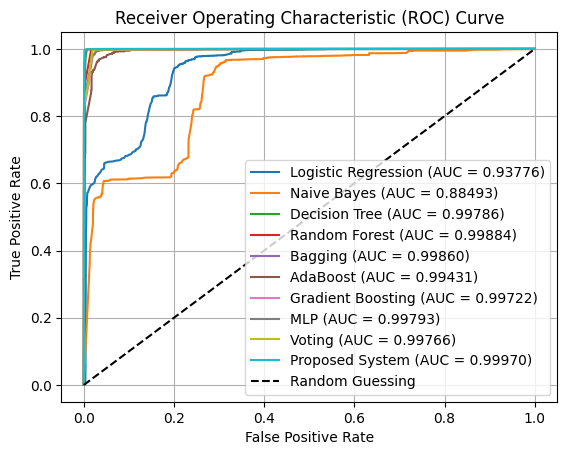

In [ ]:
# Initialize a figure
plt.figure()

for model, scores in zip(Classifer_y_score.keys(), Classifer_y_score.values()):
    # print(model)
    # print(scores)
    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.5f})')

# Plot chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.savefig(image_folder +'roc_curve_v1.png', dpi=300)  # Specify dpi for high quality
# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

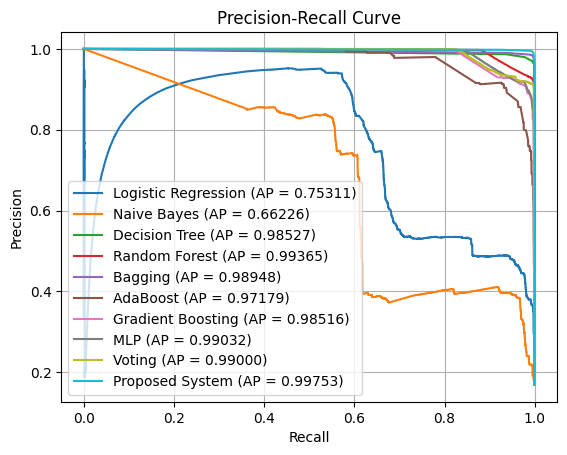

In [ ]:
# Calculate Precision-Recall curve and Average Precision for each classifier
# Initialize a figure
plt.figure()

for model, scores in zip(Classifer_y_score.keys(), Classifer_y_score.values()):
    precision, recall, _ = precision_recall_curve(y_test, scores)
    average_precision = average_precision_score(y_test, scores)

    # Plot Precision-Recall curve
    plt.plot(recall, precision, label=f'{model} (AP = {average_precision:.5f})')

# Add labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
# Save the figure as a high-quality image
plt.savefig(image_folder + 'precision_recall_curve_v1.png', dpi=300)  # Specify dpi for high quality
# Show the plot
plt.show()

In [ ]:
# Convert the nested dictionary to a DataFrame
df = pd.DataFrame.from_dict(ens_models, orient='index')



In [ ]:
df

,Accuracy,Precision,Recall,F1-score,Detection Rate,False Alarm Rate,Inference Time,Training Time
Logistic Regression,0.815249,0.476552,0.954276,0.635663,0.954276,0.213003,0.325318,9.425441
Naive Bayes,0.746590,0.395537,0.947425,0.558082,0.947425,0.294222,0.447094,1.419955
Decision Tree,0.993111,0.962205,0.998426,0.979981,0.998426,0.007970,0.105543,15.356897
Random Forest,0.984419,0.917062,0.998003,0.955822,0.998003,0.018342,4.641759,337.281096
Bagging,0.994389,0.969056,0.998669,0.983640,0.998669,0.006480,1.113594,132.413498
AdaBoost,0.948820,0.773625,0.985273,0.866715,0.985273,0.058587,3.850709,153.317197
Gradient Boosting,0.976510,0.884501,0.990221,0.934380,0.990221,0.026276,1.520645,511.506608
MLP,0.977869,0.892565,0.987872,0.937803,0.987872,0.024163,2.944701,1950.379750
Voting,0.983118,0.911603,0.996688,0.952249,0.996688,0.019640,7.639606,874.092810
Proposed System,0.997617,0.988388,0.997612,0.992978,0.997612,0.002382,110.741422,593.132460


In [ ]:
# Reset index to turn the classifier names into a column (optional)
df.reset_index(inplace=True)
df.rename(columns={'index': 'Classifier'}, inplace=True)



In [ ]:
df

,Classifier,Accuracy,Precision,Recall,F1-score,Detection Rate,False Alarm Rate,Inference Time,Training Time
0,Logistic Regression,0.815249,0.476552,0.954276,0.635663,0.954276,0.213003,0.325318,9.425441
1,Naive Bayes,0.746590,0.395537,0.947425,0.558082,0.947425,0.294222,0.447094,1.419955
2,Decision Tree,0.993111,0.962205,0.998426,0.979981,0.998426,0.007970,0.105543,15.356897
3,Random Forest,0.984419,0.917062,0.998003,0.955822,0.998003,0.018342,4.641759,337.281096
4,Bagging,0.994389,0.969056,0.998669,0.983640,0.998669,0.006480,1.113594,132.413498
5,AdaBoost,0.948820,0.773625,0.985273,0.866715,0.985273,0.058587,3.850709,153.317197
6,Gradient Boosting,0.976510,0.884501,0.990221,0.934380,0.990221,0.026276,1.520645,511.506608
7,MLP,0.977869,0.892565,0.987872,0.937803,0.987872,0.024163,2.944701,1950.379750
8,Voting,0.983118,0.911603,0.996688,0.952249,0.996688,0.019640,7.639606,874.092810
9,Proposed System,0.997617,0.988388,0.997612,0.992978,0.997612,0.002382,110.741422,593.132460


In [ ]:
# Save the DataFrame to an Excel file
df.to_excel(image_folder +'metrics_v1.xlsx', index=False)

print("DataFrame saved to 'metrics.xlsx'.")

DataFrame saved to 'metrics.xlsx'.


In [ ]:
 kRandomForestClassifier(random_state=43,max_depth=None, n_jobs=-1)
BaggingClassifier(DecisionTreeClassifier(),random_state=43)
daBoostClassifier(random_state=43)
HistGradientBoostingClassifier(random_state=43)